In [1]:
using FFTW
using Plots
gr()

Plots.GRBackend()

In [99]:
# Set Time Parameters
t0=0
tf=10
dt=.01

# Set Space Grid Parameters 
dx=.05
xmax=8
# xmin will be -xmax.  Making the situation symmetric


8

In [112]:
t=collect(t0:dt:tf)
x=collect(-xmax:dx:xmax)

nt=length(t)
N=length(x)

dk=2*π/(N*dx)
k = [ collect(0:((N-1)/2)) ; collect(-(N-1)/2:-1) ] *2*π/(N*dx);

In [128]:
Vx=.5*x.^2;
Vk=.5*k.^2

Uxh=exp.(-Vx*dt/2);
Ux=exp.(-Vx*dt);
Uf=exp.(-Vk*dt);
"potentials and evolvers defined"

"potentials and evolvers defined"

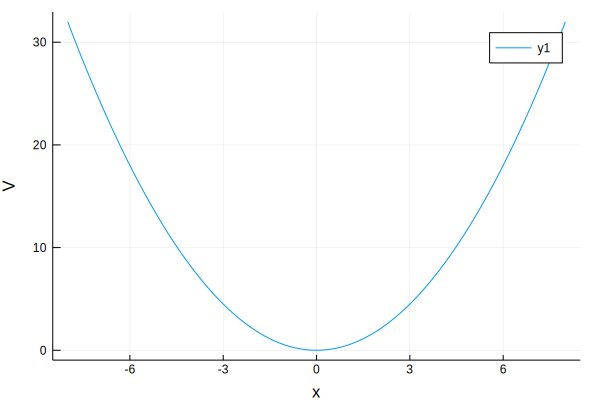

In [102]:
plot(x, Vx)

plot!(xlabel="x", ylabel="V",
plot_title="Double Well Potential")

In [103]:
ϕ(x)=π^(-.25)*exp(-x.^2/2)

ϕ (generic function with 1 method)

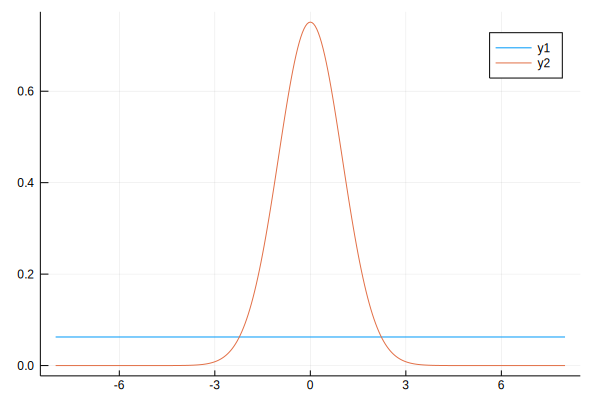

In [104]:
Ψ0=(1.0/(2*xmax))*ones(Complex{Float64},N);
Ψtrue=(1+0*im).*ϕ.(x);
plot(x,abs.(Ψ0))
plot!(x,abs.(Ψtrue))

## Evolvers

In [129]:
ft=plan_fft(Ψ0);
Ψf=ft*Ψ0;
ift=plan_ifft(Ψf);

In [130]:
nmeas=nt

Ex=zeros(Float64,nmeas);
Ek=zeros(Float64,nmeas);
E=zeros(Float64,nmeas);
E2=zeros(Float64,nmeas);

c=zeros(Float64,nmeas);

In [131]:
Ψ0=(1.0/(2*xmax))*ones(Complex{Float64},N);
Ψ=copy(Ψ0);
jj=1

# The operators we have to start off with
Ψ=Ψ.*Uxh

Psif=ft*Ψ
Psif=Psif.*Uf    
Ψ=ift*Psif

for ii in 1:nt
    
    Ψ=Ψ.*Ux
    
    
    Psif=ft*Ψ
    Psif=Psif.*Uf 
    
    Ψ=ift*Psif   
    nn=sum(conj(Ψ).*Ψ)*dx
    Ψ=1/sqrt(nn)*Ψ
    
    if ii%1 == 0
        # Every time we measure, we have to finish with a U_x half time step
        Ψt=Ψ.*Uxh
        Ψft=ft*Ψt
    
        Ex[jj]=real(sum(conj(Ψt).*Vx.*Ψt))*dx
        
        Ek[jj]=real(sum(conj(Ψft).*Vk.*Ψft))*dk 
    
        E[jj]=real(sum(conj(Ψt).*Vx.*Ψt)*dx+sum(conj(Ψft).*Vk.*Ψft)*dk )
        
        c[jj]=abs(sum( conj(Ψt).* Ψtrue)) *dx
        
        #println(ii,"\t",E[jj],"\t",c[jj],"\t",Ex[jj],"\t",Ek[jj])
        
        jj+=1
    end
end    


Ψ=Ψ.*Uxh;

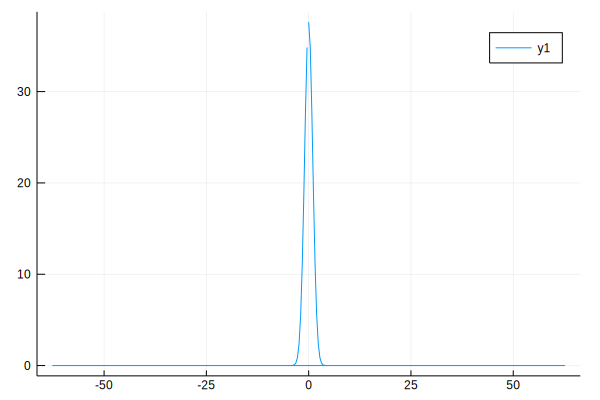

In [135]:
plot(k,abs.(ft*Ψ))

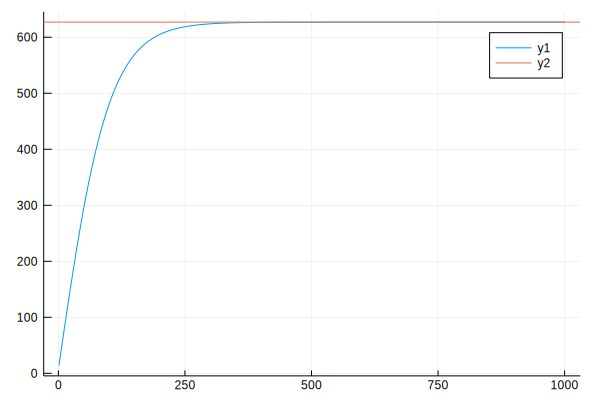

In [133]:
plot(E)
hline!([E[end]])

In [91]:
E[end]

40.39912297580233

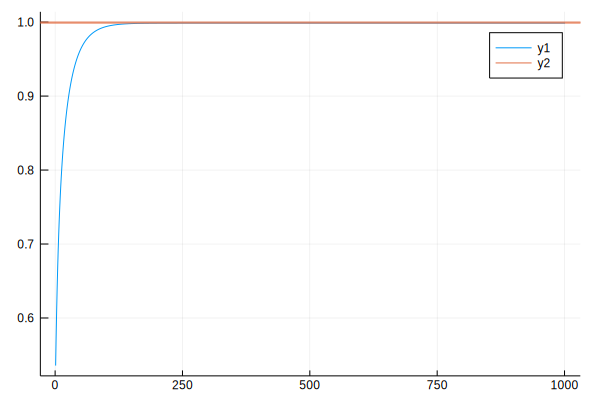

In [92]:
plot(c)
hline!([c[end],1])

In [93]:
c[end]

0.9987476650593152

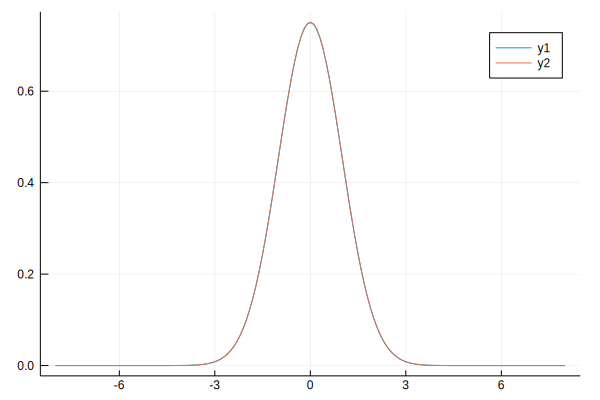

In [94]:
plot(x,abs.(Ψ))
plot!(x,abs.(Ψtrue))

In [111]:
sum(conj(Ψ).*Ψ)*dx

0.9974968984809055 + 0.0im

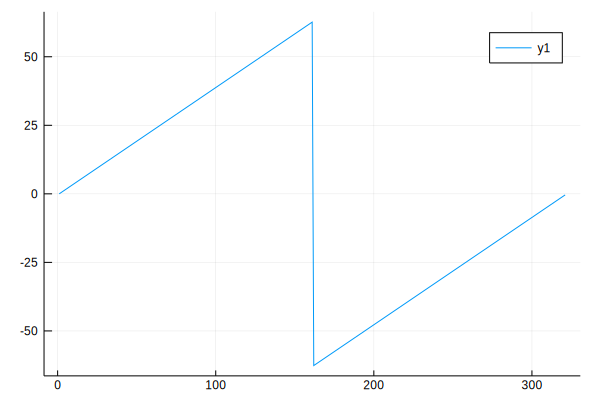

In [134]:
plot(k)